<a href="https://colab.research.google.com/github/padolekrushna/Projects_on_ML/blob/main/Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <div style="padding: 20px;color:white;margin:10;font-size:131%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> The Impact of Medicine to your Wallet</span></b> </div>

Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients.

But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.


### <b><span style='color:#846c5b'>|</span> Domain Knowledge</b>

<br>

1. **`Age`**: Age is a significant factor in health insurance as older individuals are generally at a higher risk of health issues compared to younger individuals. Therefore, age often correlates with higher insurance charges.

2. **`Sex`**: Gender can play a role in health insurance costs. Some studies suggest that women tend to use more health care services, especially during childbearing years. However, the impact of gender on health insurance charges can vary depending on other factors.

3. **`BMI (Body Mass Index)`**: BMI is a measure that attempts to quantify an individual's tissue mass. It's widely used as a simple method to assess whether a person has a healthy body weight for a given height. High BMI values are often associated with higher risk of chronic diseases like heart disease, diabetes, and certain types of cancer, which can lead to higher health care costs.

4. **`Children`**: The number of dependents a person has can influence health insurance costs. More dependents usually mean higher insurance charges because more individuals are covered under the same plan.

5. **`Smoker`**: Smoking is a significant risk factor for many health conditions, including heart disease, stroke, and cancer. Smokers often face higher health insurance charges due to these increased health risks.

6. **`Region`**: The region where the beneficiary lives can also affect health insurance charges. This could be due to variations in cost of living, health care costs, and health behaviors across different regions.

7. **`Charges`**: This is the individual medical costs billed by health insurance. It's the dependent variable in this dataset, and it's influenced by all the other factors. Understanding the relationships between the independent variables (age, sex, bmi, children, smoker, region) and charges is the main goal of this analysis.


### <b> <span style='color:#7b3f00'>|</span> Import libraries</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
matplotlib.style.use('seaborn-notebook')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Suppress Scientific Notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# for HD visualizations
%config InlineBackend.figure_format='retina'

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

C:\Users\prave\AppData\Local\Temp\ipykernel_16016\3204938556.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn-notebook')


In [ ]:
insurance_df = pd.read_csv(r"C:\Data\insurance.csv")

In [ ]:
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


! ![image-2.png](attachment:image-2.png)

### <b> <span style='color:#7b3f00'>|</span> Handling Duplicates</b>

In [ ]:
# Handle duplicates
duplicate_rows_data = insurance_df[insurance_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 7)


In [ ]:
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.56


In [ ]:
insurance_df = insurance_df.drop_duplicates()

### <b> <span style='color:#7b3f00'>|</span> Uniqueness</b>

In [ ]:
# Loop through each column and count the number of distinct values
for column in insurance_df.columns:
    num_distinct_values = len(insurance_df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 47 distinct values
sex: 2 distinct values
bmi: 548 distinct values
children: 6 distinct values
smoker: 2 distinct values
region: 4 distinct values
charges: 1337 distinct values


### <b><span style='color:#7b3f00'>|</span> Missing Values</b>

In [ ]:
# Missing or Null values
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### <b> <span style='color:#7b3f00'>|</span> Describe the Data</b>

In [ ]:
insurance_df.describe().style.format("{:.2f}")

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


![image.png](attachment:image.png)

# Univariate analysis

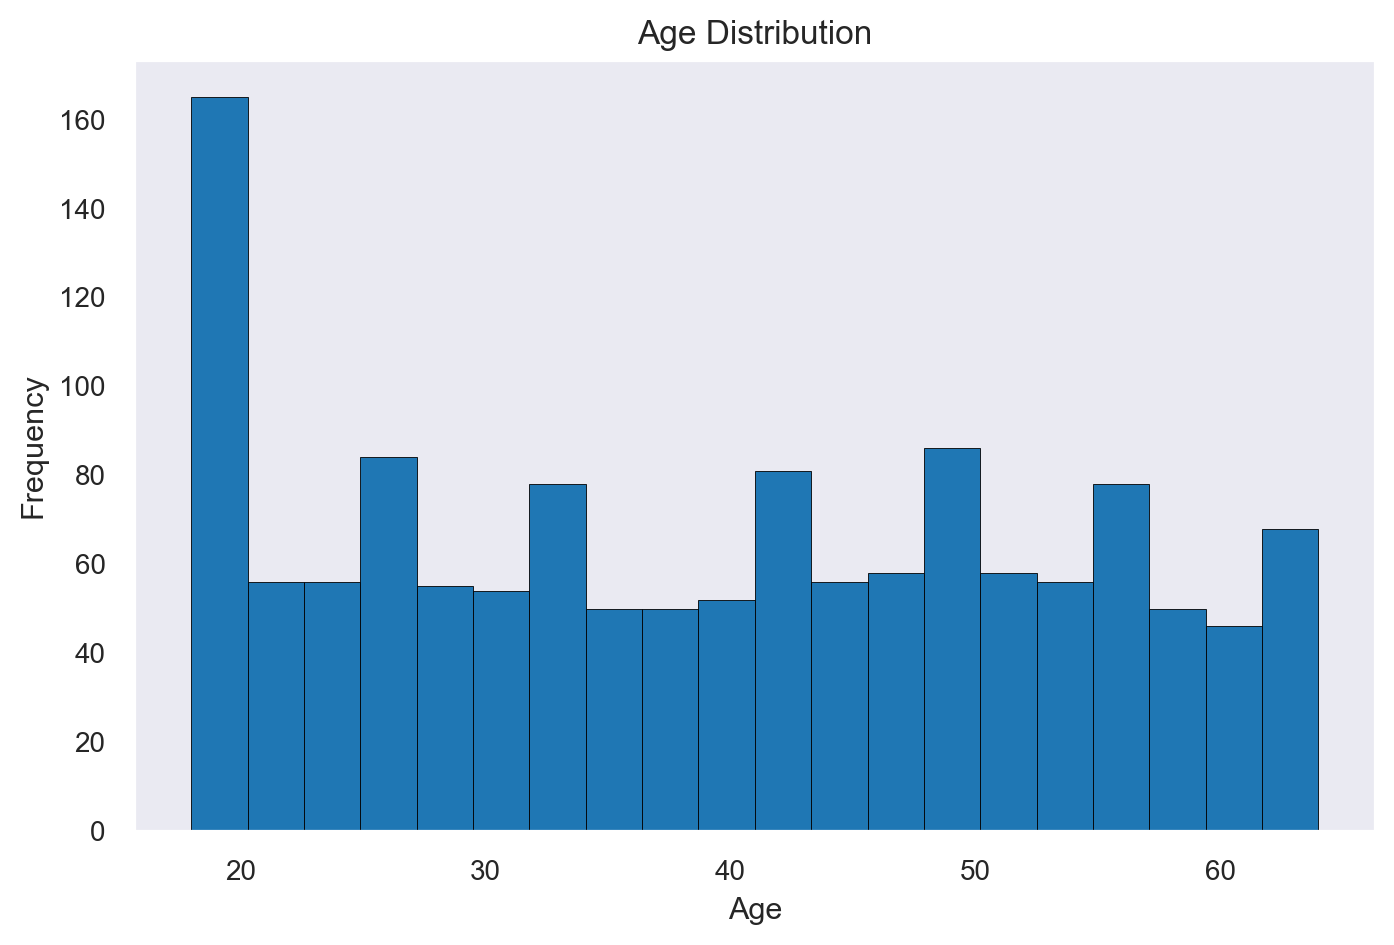

In [ ]:
# Histogram of age distribution
plt.figure(figsize=(8, 5))
plt.hist(insurance_df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show();

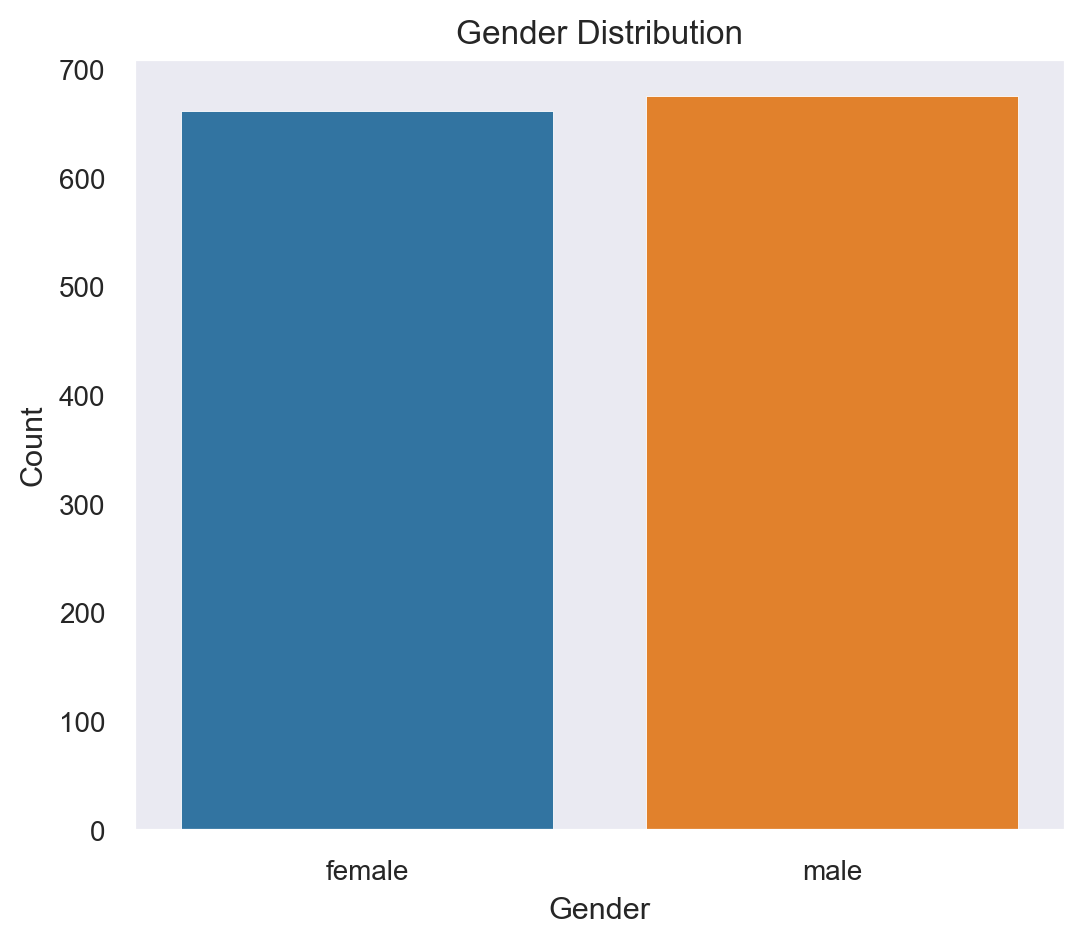

In [ ]:
# Bar plot of gender distribution
plt.figure(figsize=(6,5))
sns.countplot(data = insurance_df, x ='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show();

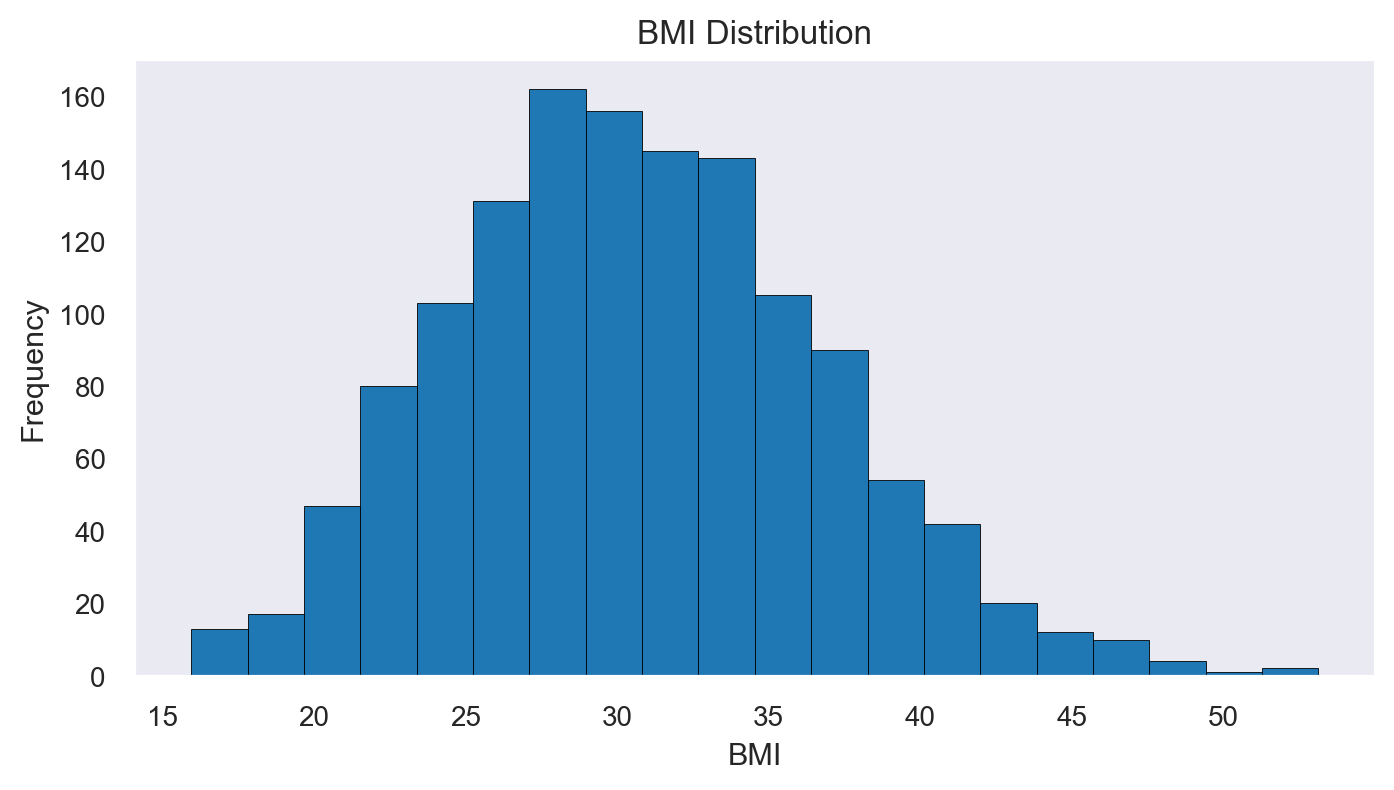

In [ ]:
# Histogram of BMI values
plt.figure(figsize=(8, 4))
plt.hist(insurance_df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show();

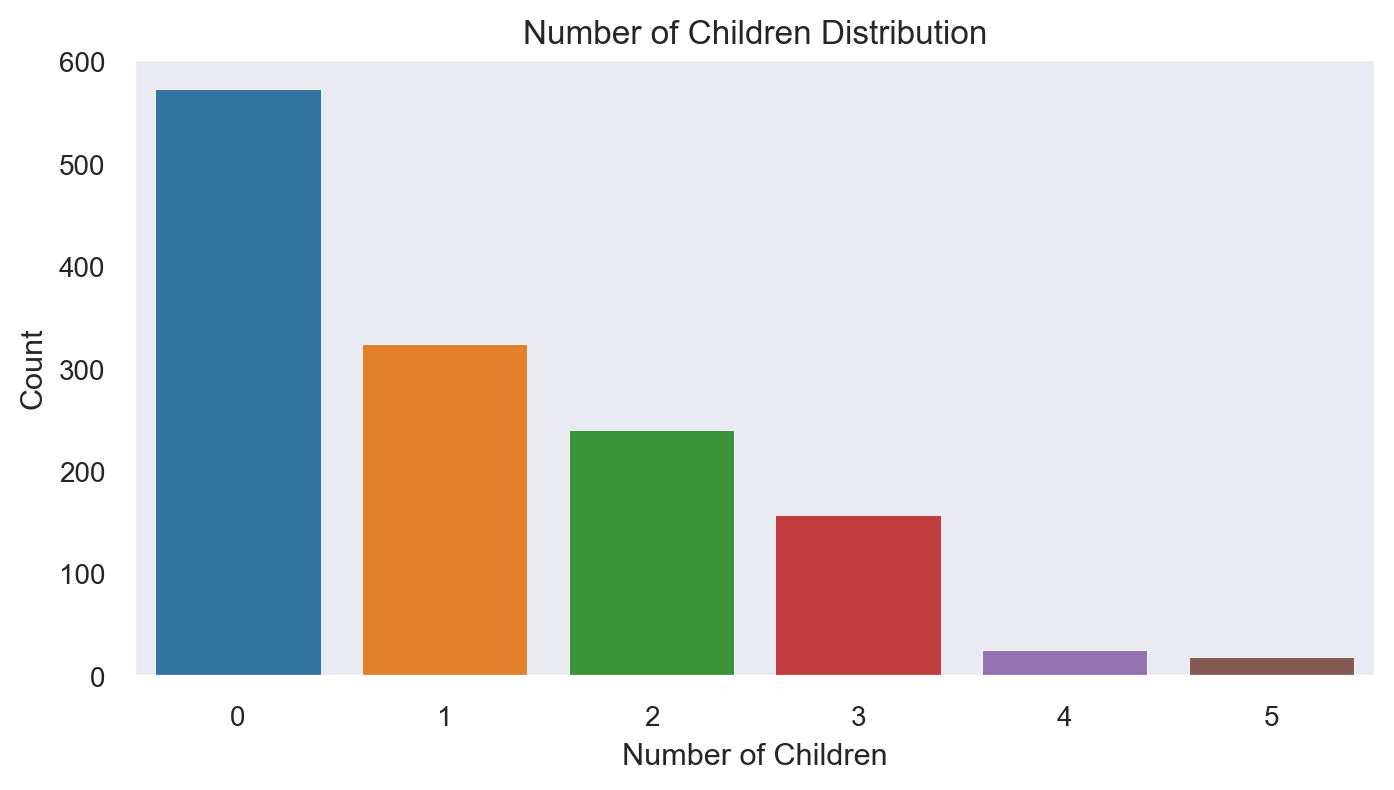

In [ ]:
# Visualization : Bar plot of the number of children/dependents
plt.figure(figsize=(8,4))
sns.countplot(data = insurance_df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show();

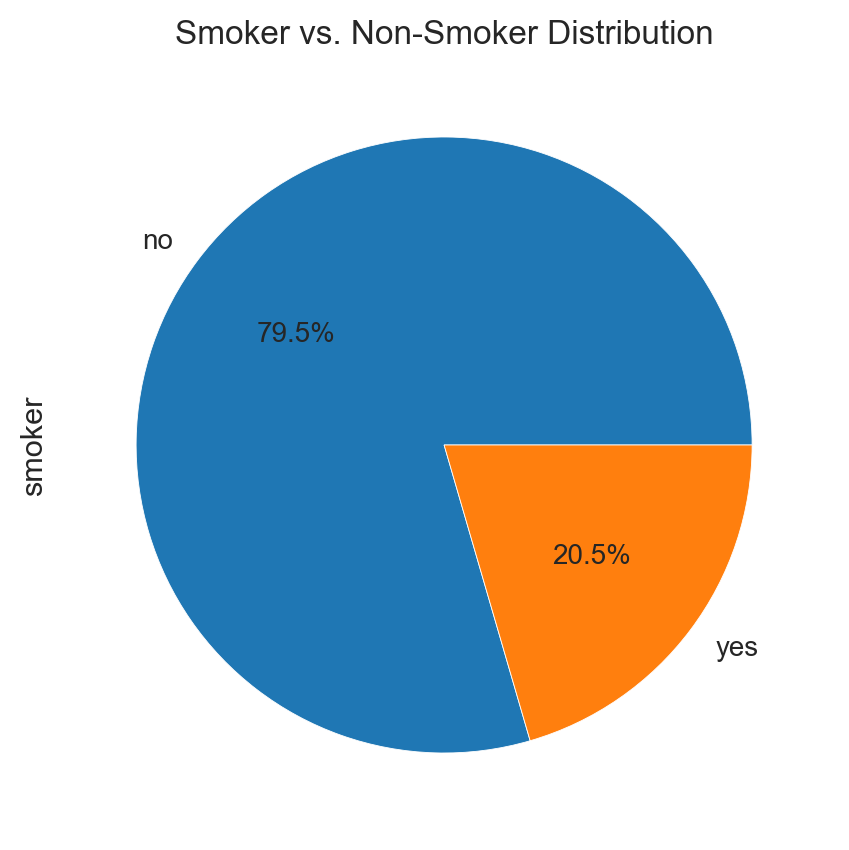

In [ ]:
# Pie chart of smoker vs. non-smoker distribution
plt.figure(figsize=(5,5))
insurance_df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show();

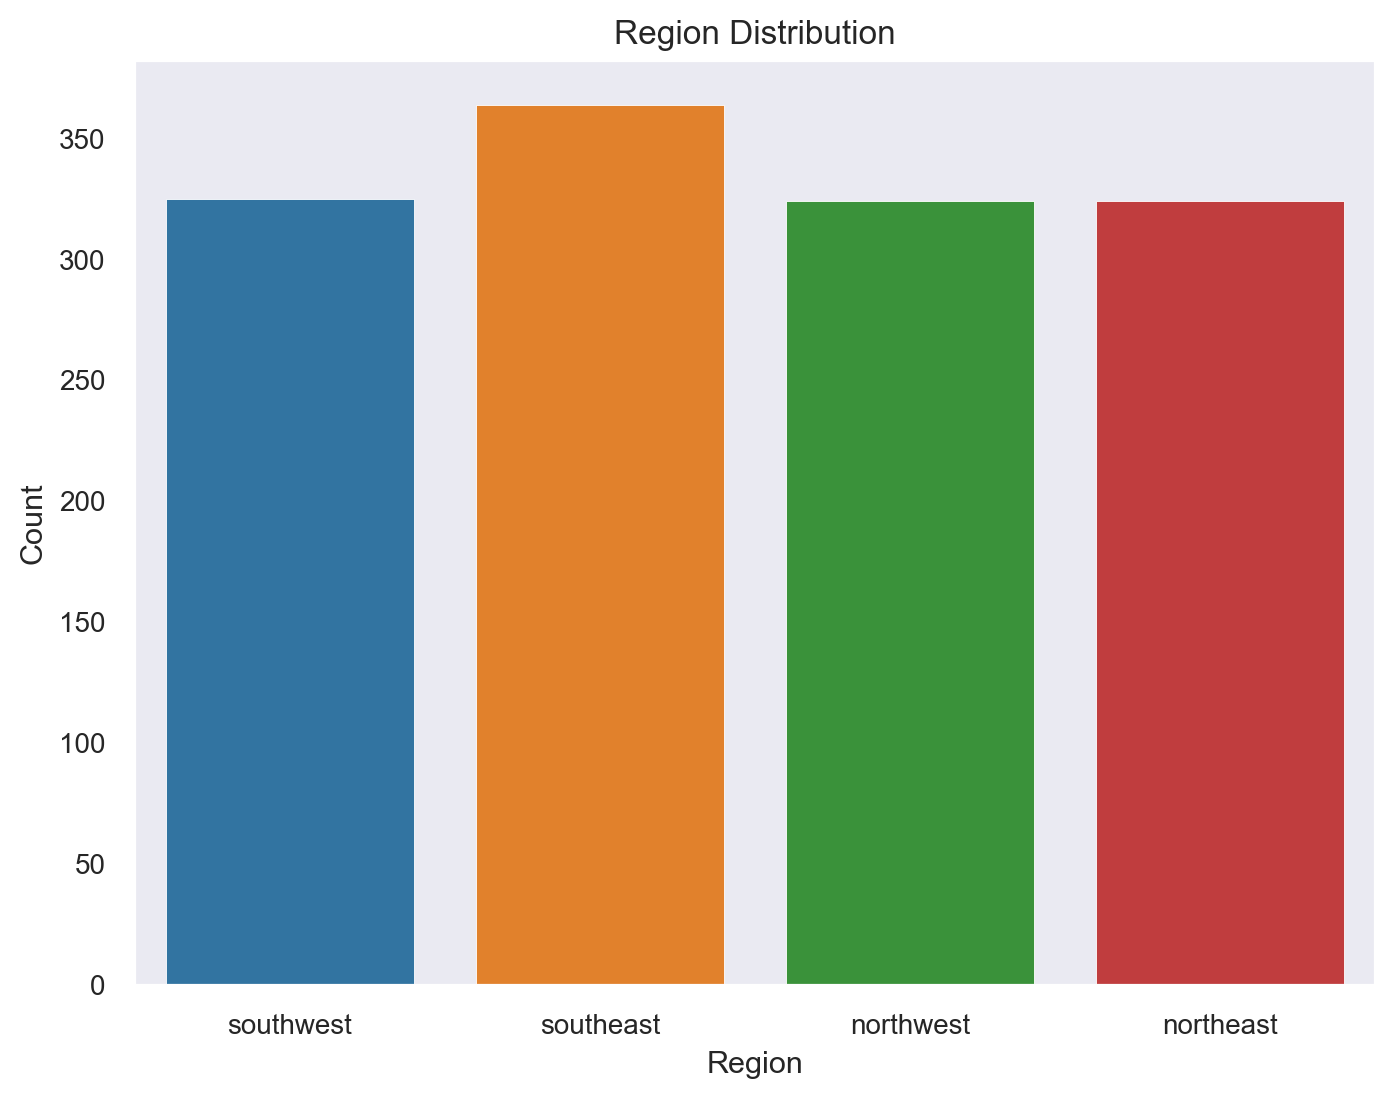

In [ ]:
# Bar plot of region distribution
plt.figure(figsize=(8, 6))
sns.countplot(data = insurance_df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show();

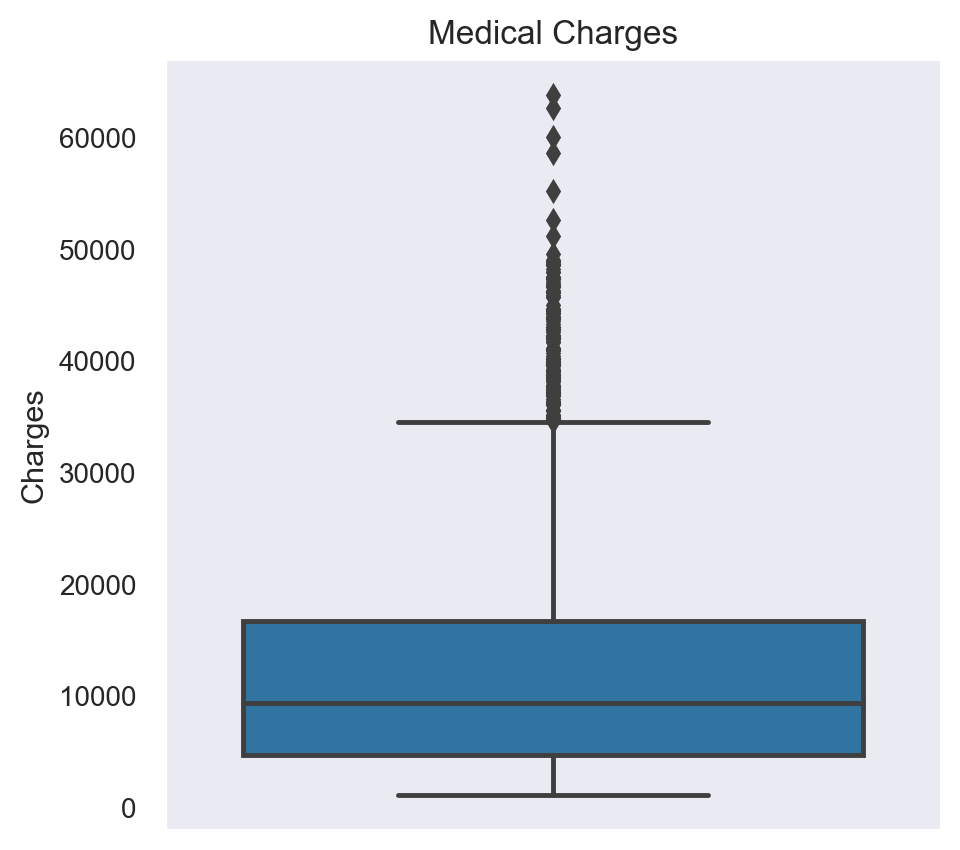

In [ ]:
# Box plot of medical charges
plt.figure(figsize=(5,5))
sns.boxplot(data = insurance_df, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.show();

# Bi-Variate Analysis

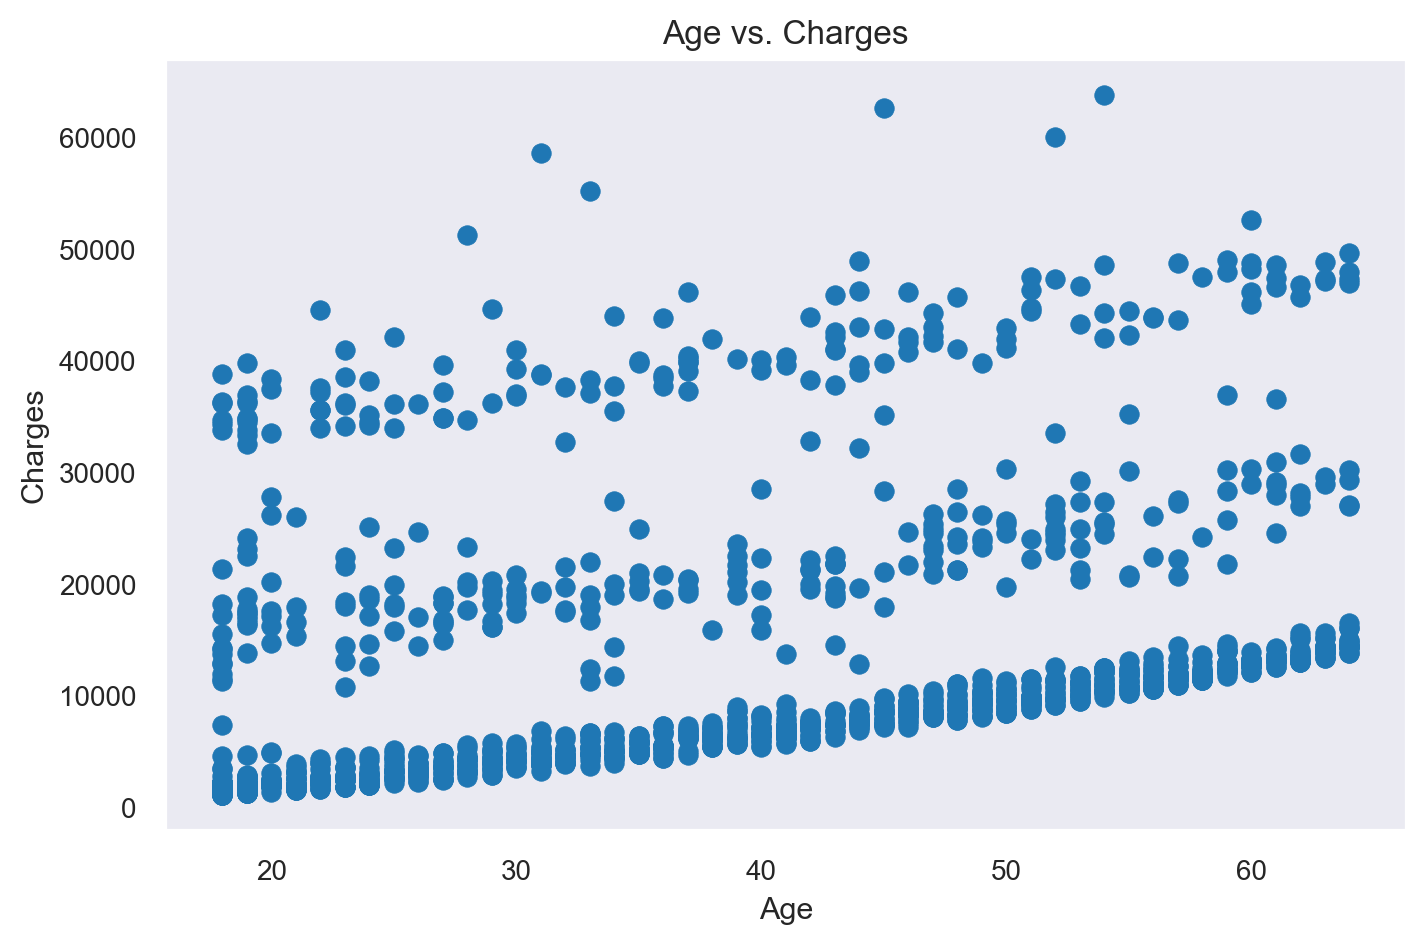

In [ ]:
# Scatter plot of age vs. charges
plt.figure(figsize=(8,5))
plt.scatter(insurance_df['age'], insurance_df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show();

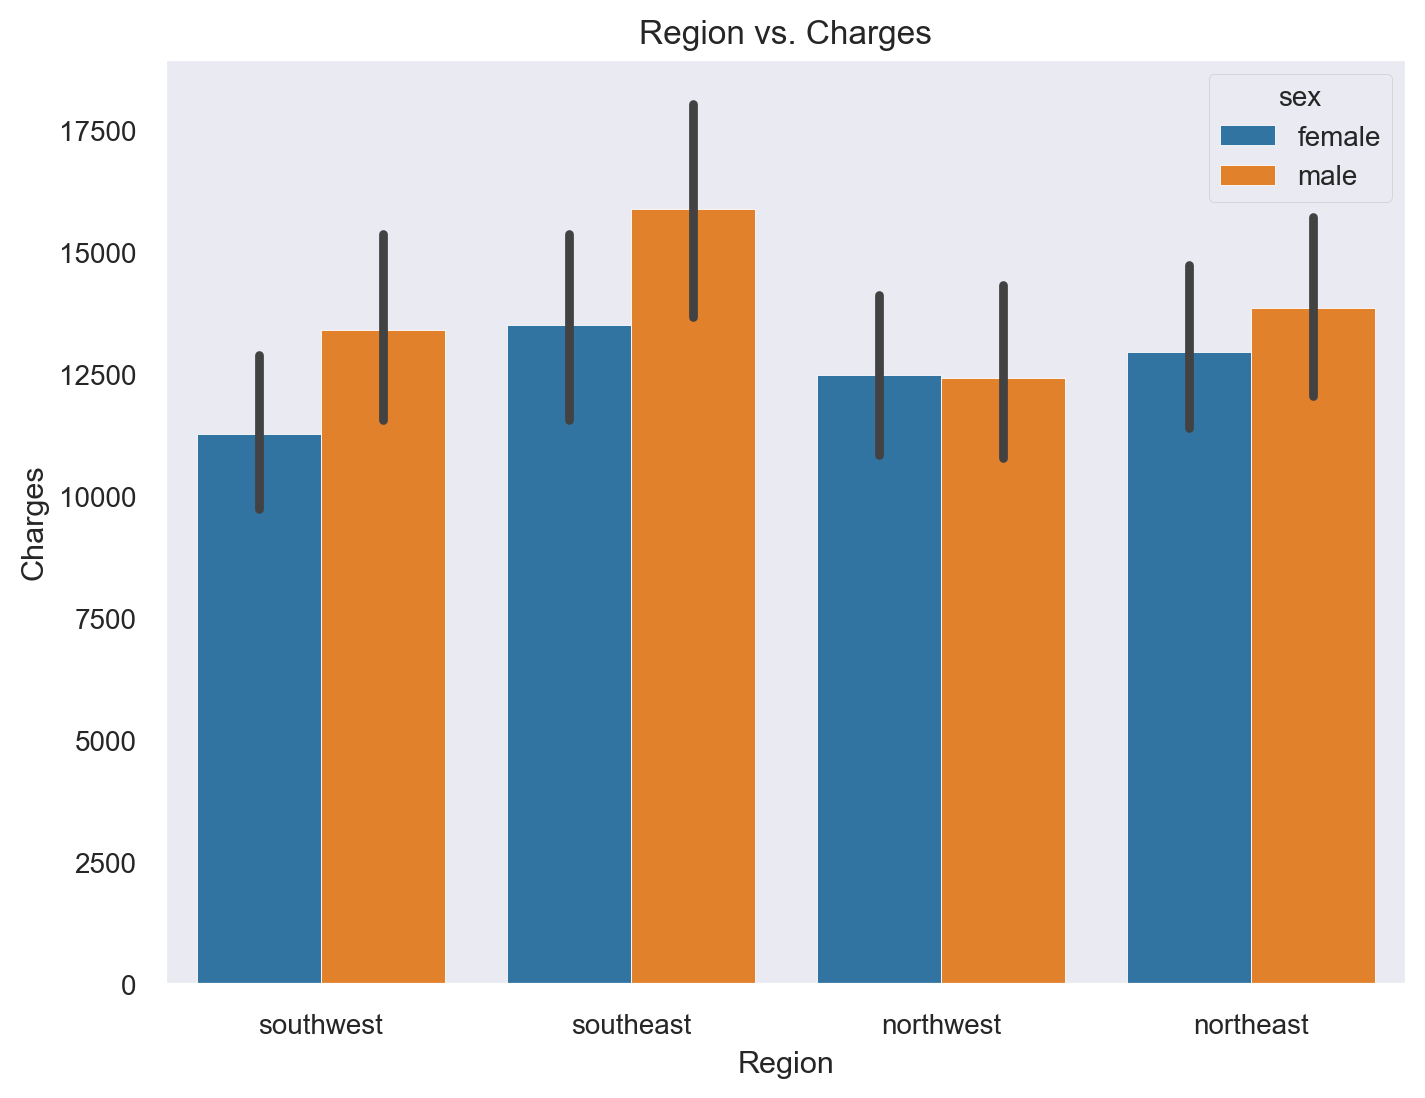

In [ ]:
# Stacked bar plot of region vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data = insurance_df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show();

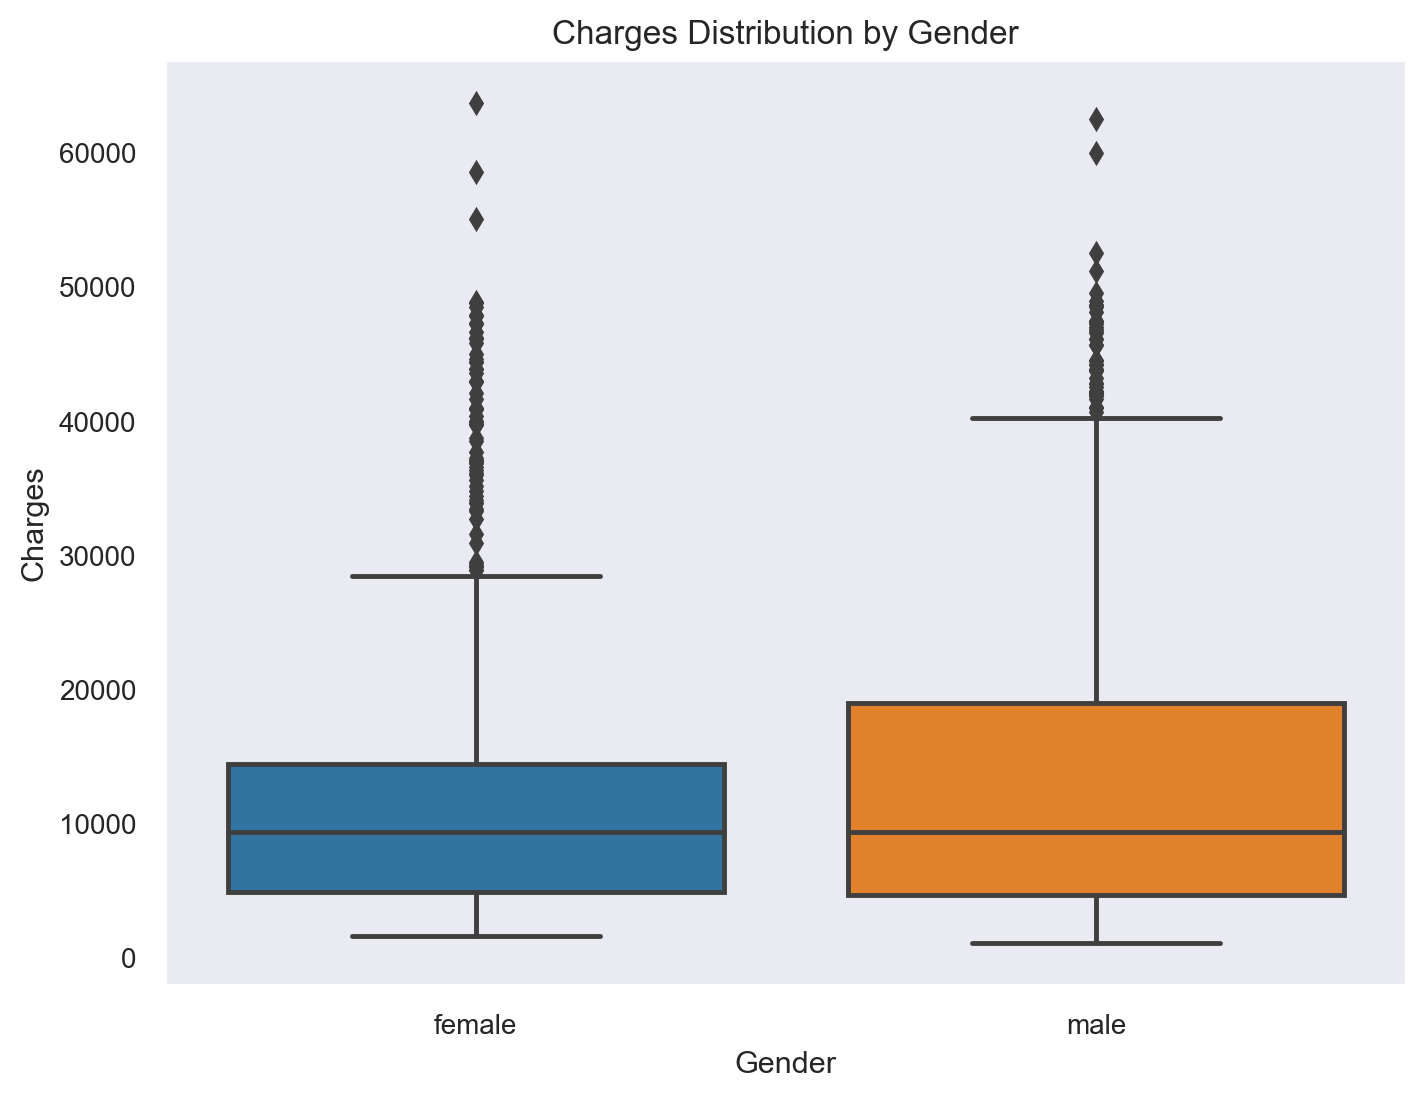

In [ ]:
# Box plot of charges grouped by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=insurance_df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show();

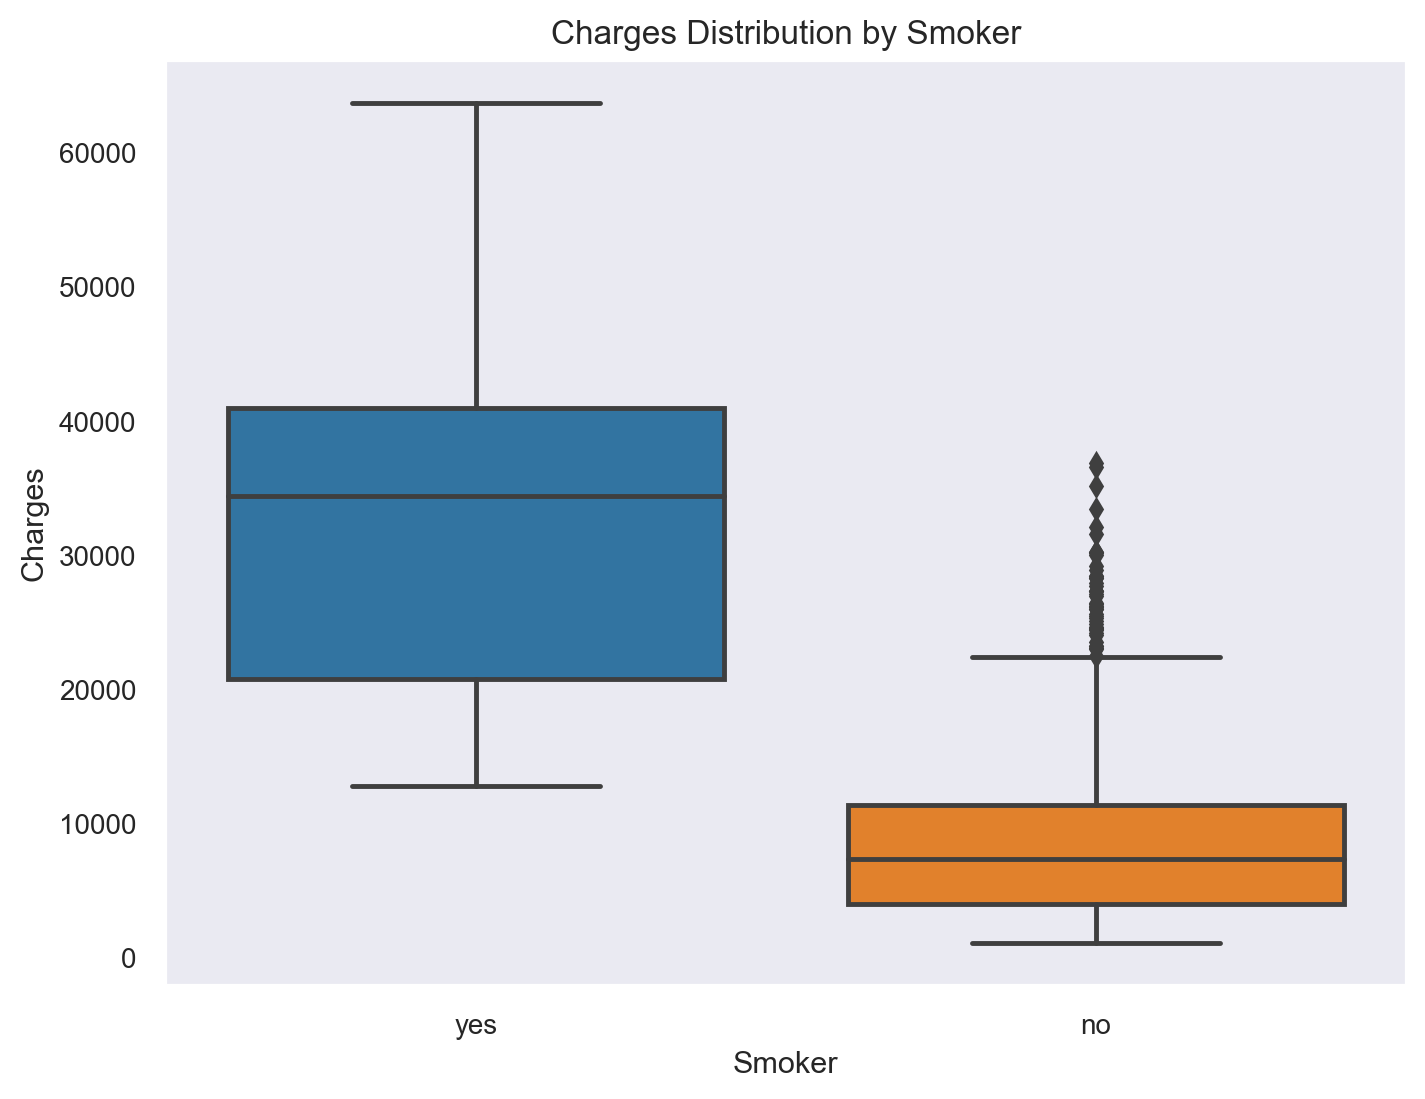

In [ ]:
# Box plot of charges grouped by smoker vs. non-smoker
plt.figure(figsize=(8, 6))
sns.boxplot(data=insurance_df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show();

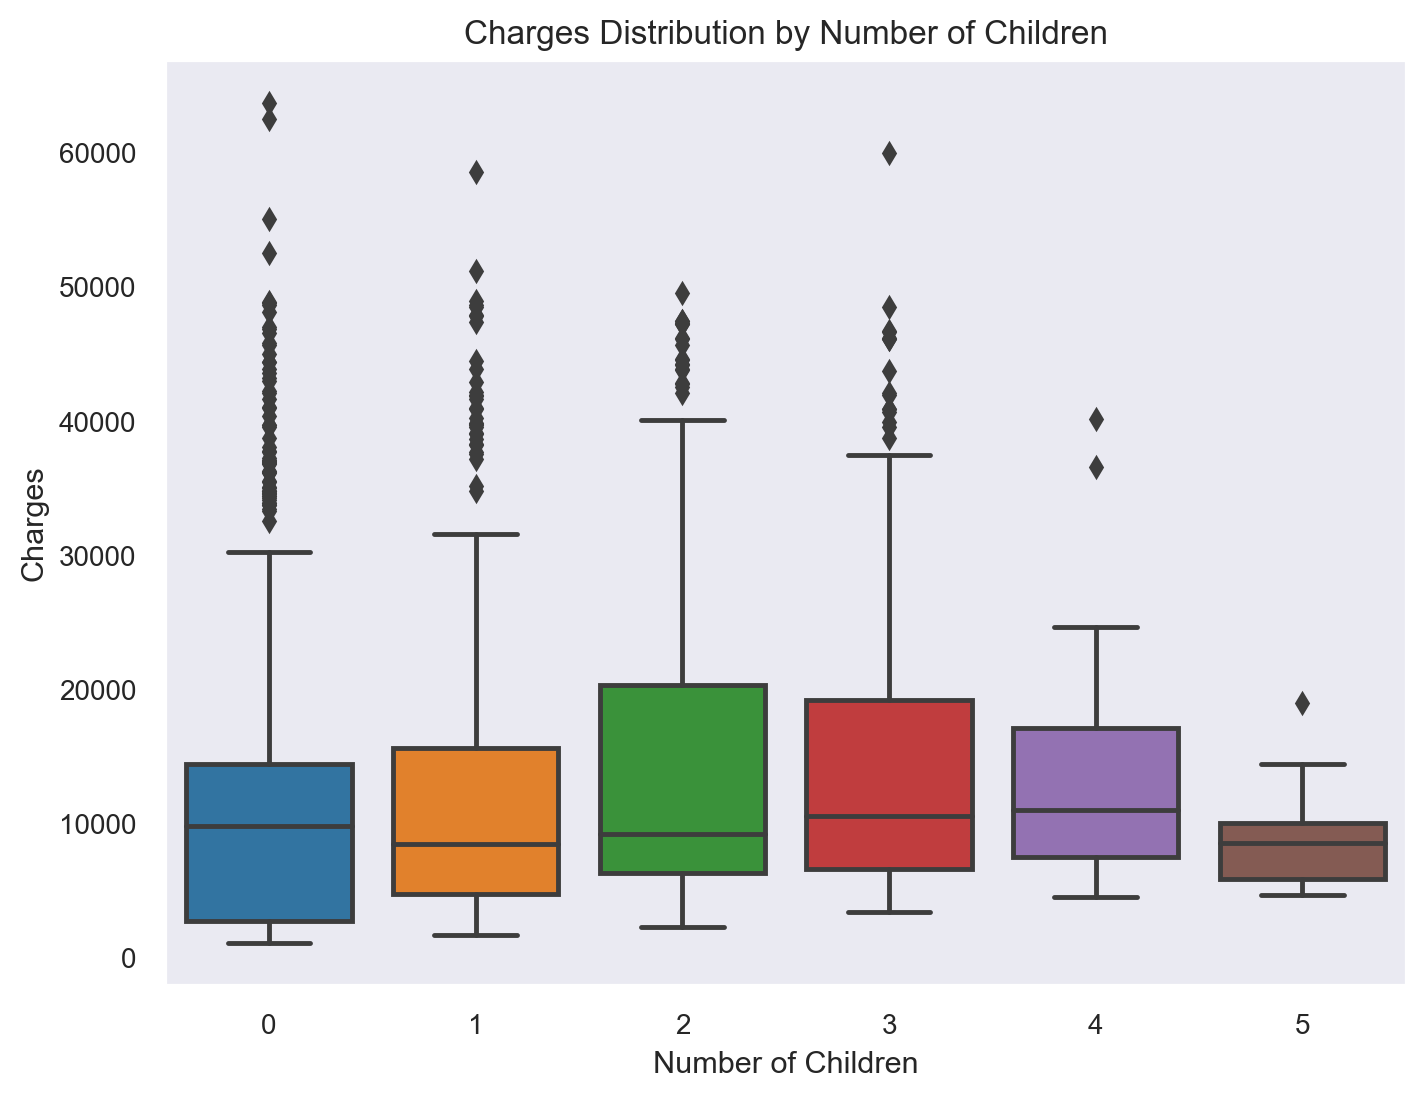

In [ ]:
# Box plot of charges grouped by the number of children
plt.figure(figsize=(8, 6))
sns.boxplot(data=insurance_df, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of Children')
plt.show();

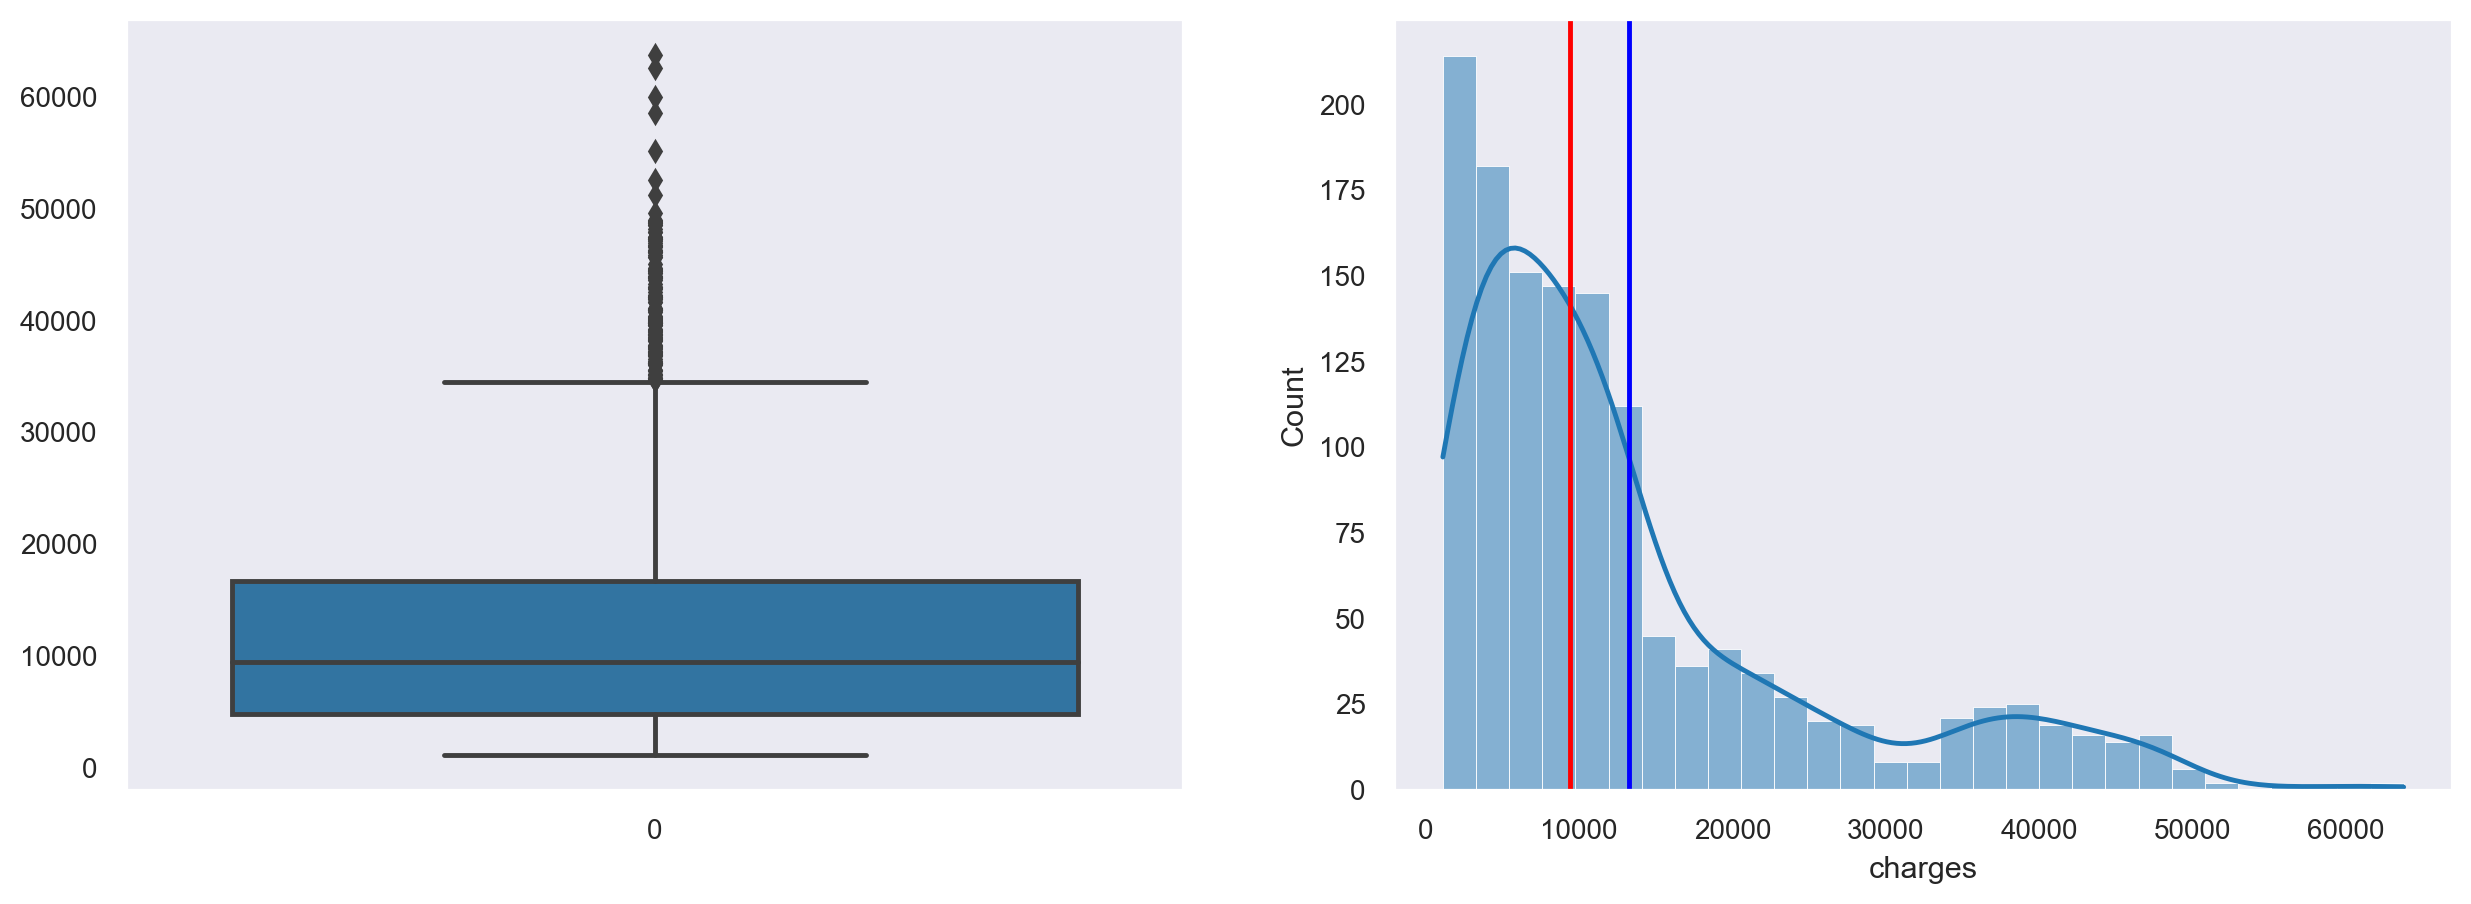

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(insurance_df.charges)

plt.subplot(122)
sns.histplot(insurance_df.charges.astype(float), kde = True)
plt.axvline(insurance_df.charges.astype(float).mean(), color = 'blue')
plt.axvline(insurance_df.charges.astype(float).median(), color = 'red');

In [ ]:
insurance_df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12384.70,1121.87,63770.43
1,12731.17,1711.03,58571.07
2,15073.56,2304.00,49577.66
3,15355.32,3443.06,60021.40
4,13850.66,4504.66,40182.25
5,8786.04,4687.80,19023.26


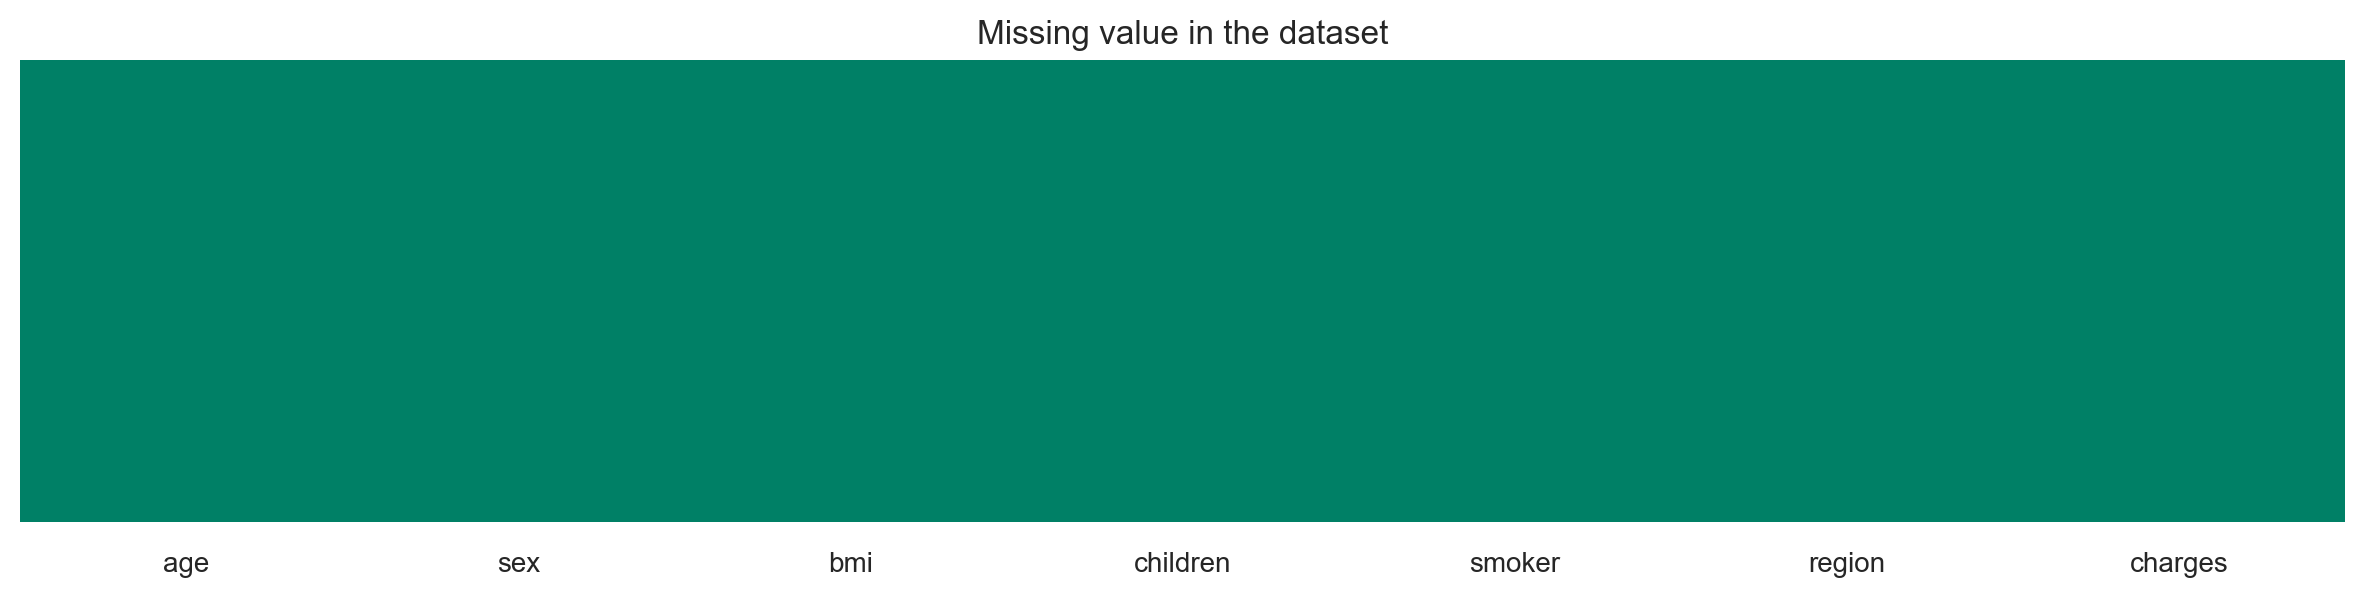

In [ ]:
# Outliers
plt.figure(figsize=(15,3))
sns.heatmap(insurance_df.isnull(),cbar=False,cmap='summer',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing values in data set

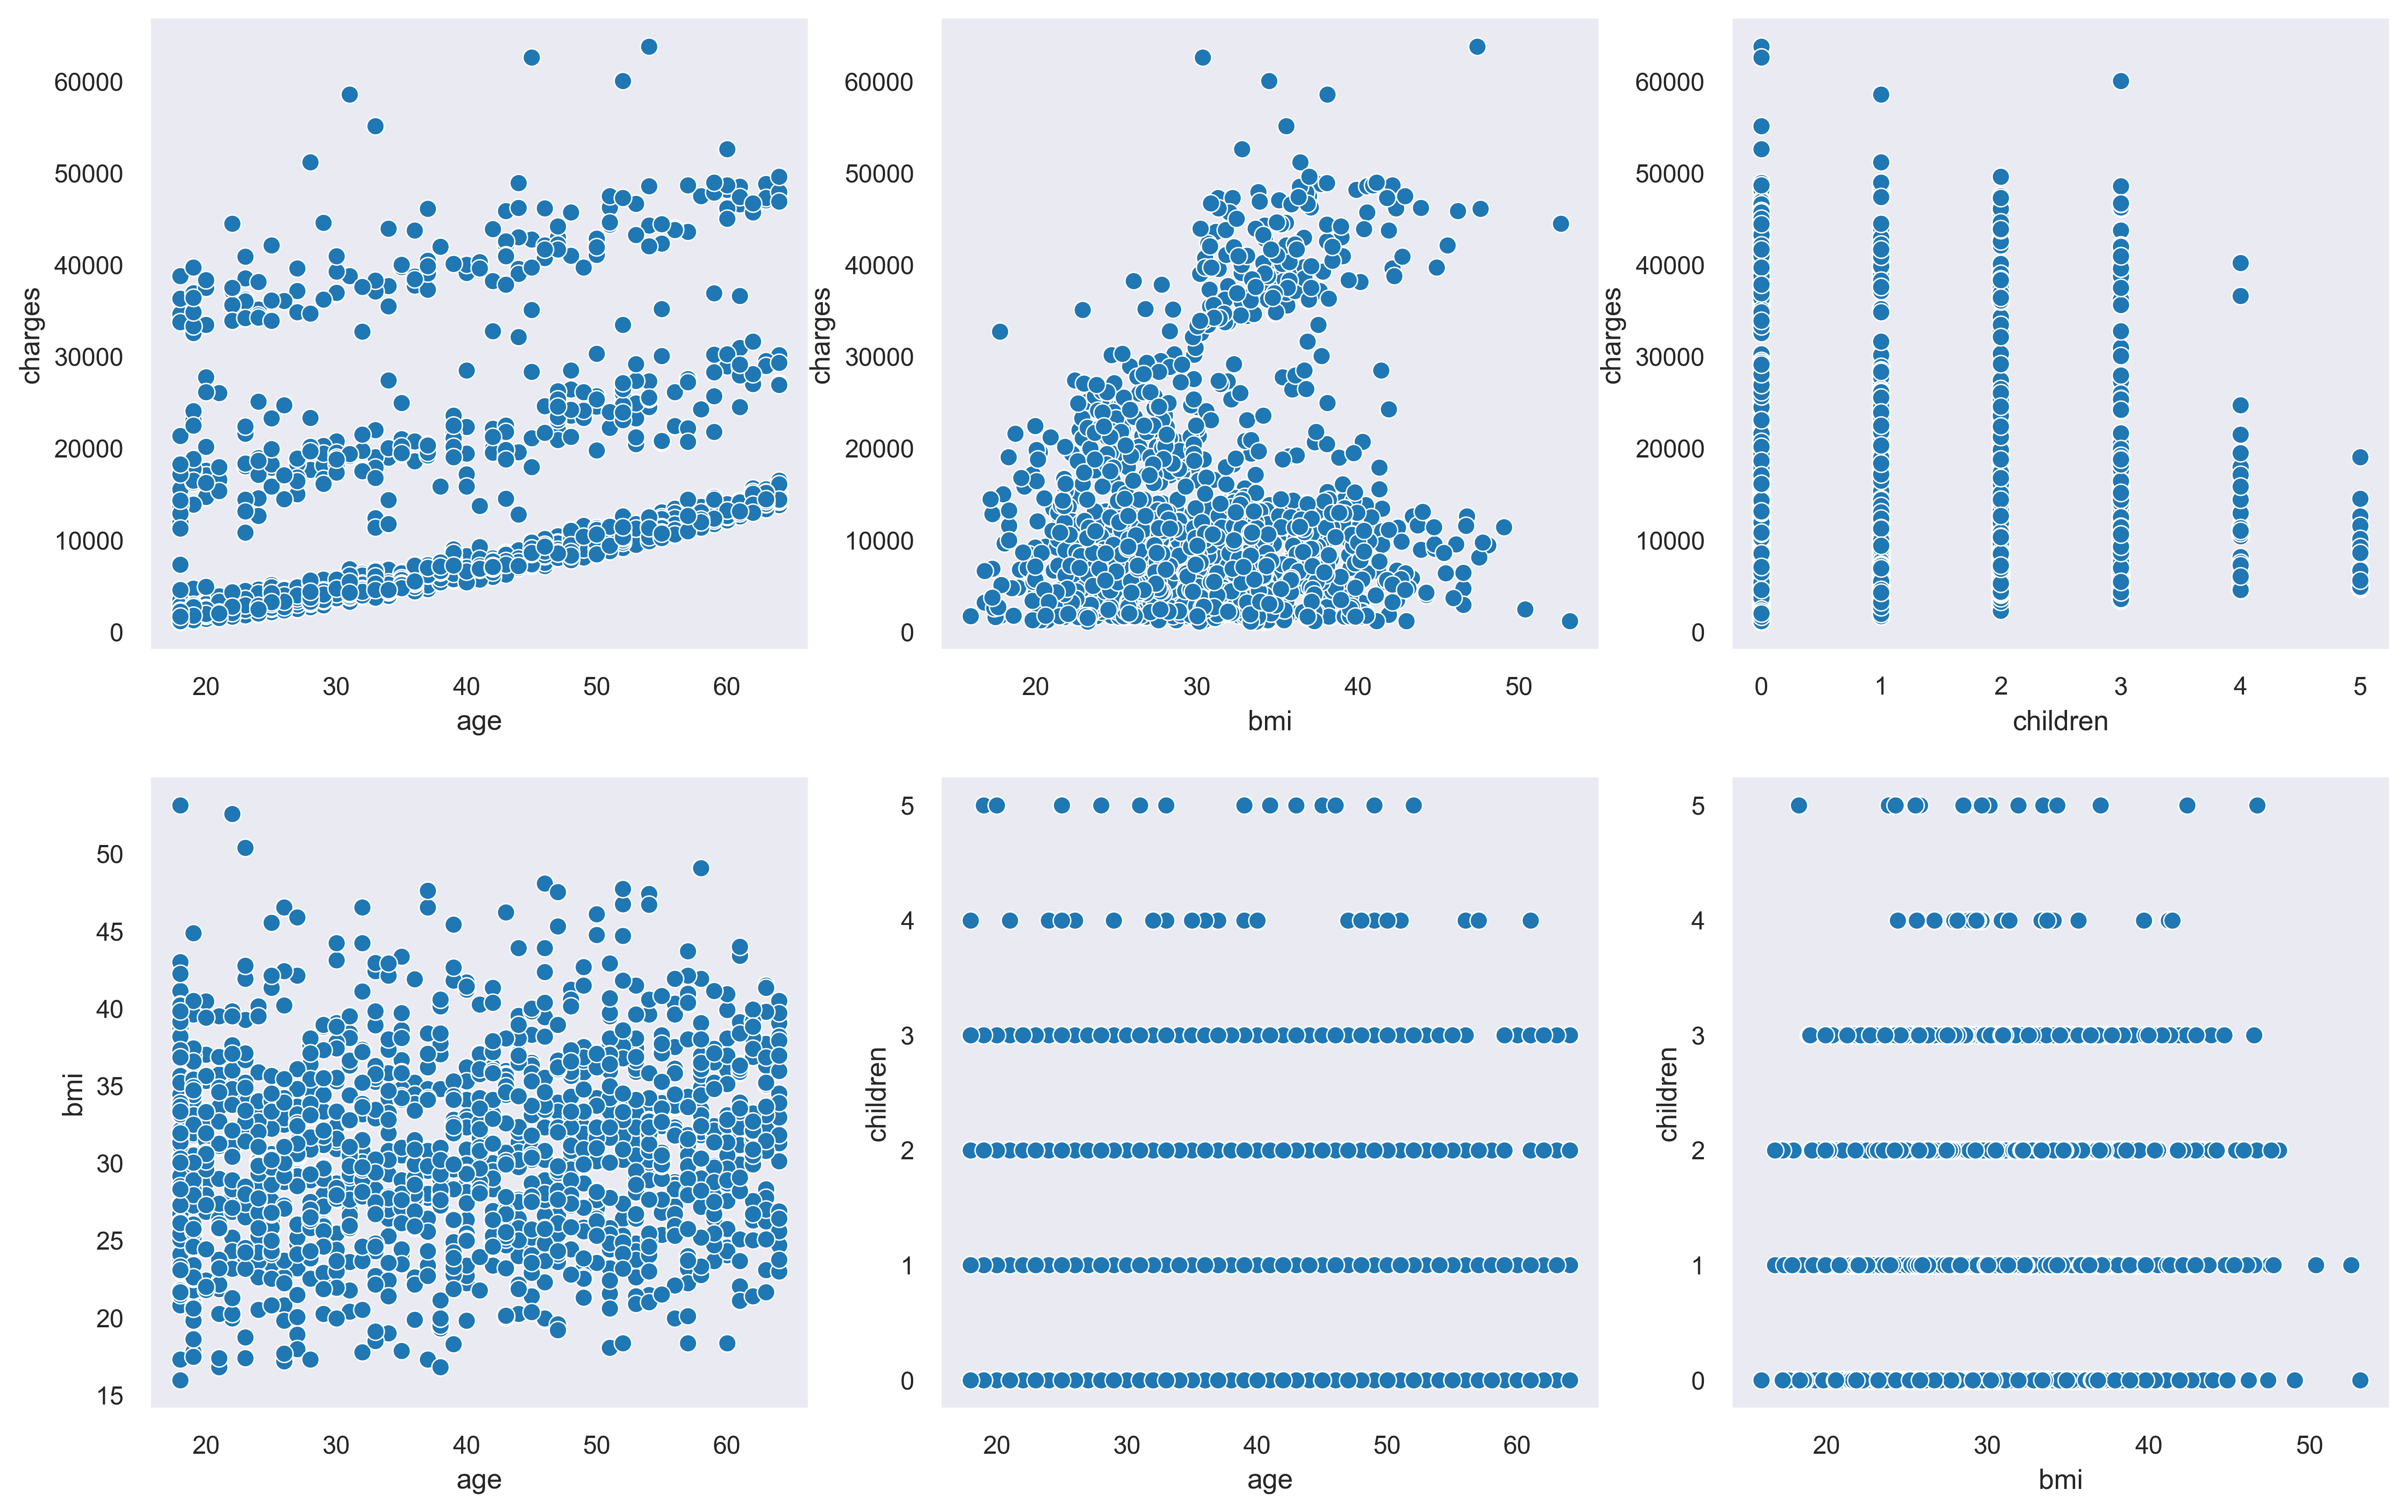

In [ ]:
plt.figure(figsize=(16,10), dpi = 200)
plt.subplot(231)
sns.scatterplot(data = insurance_df, x ='age', y = 'charges')
plt.subplot(232)
sns.scatterplot(data =insurance_df, x = 'bmi', y = 'charges')
plt.subplot(233)
sns.scatterplot(data =insurance_df, x = 'children', y = 'charges')
plt.subplot(234)
sns.scatterplot(data =insurance_df, x = 'age', y = 'bmi')
plt.subplot(235)
sns.scatterplot(data =insurance_df, x = 'age', y = 'children')
plt.subplot(236)
sns.scatterplot(data =insurance_df, x = 'bmi', y = 'children');

! ![image.png](attachment:image.png)

## Data Preprocessing

### <b><span style='color:#7b3f00'>|</span> Encoding </b>

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

### <b><span style='color:#7b3f00'>|</span> Label Encoding </b>

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

### <b><span style='color:#7b3f00'>|</span> One Hot encoding </b>

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [ ]:
X = insurance_df[['age','sex','bmi','smoker','children']]
y = insurance_df['charges']

In [ ]:
X.head()
y.head()

,age,sex,bmi,smoker,children
0,19,female,27.90,yes,0
1,18,male,33.77,no,1
2,28,male,33.00,no,3
3,33,male,22.70,no,0
4,32,male,28.88,no,0


0   16884.92
1    1725.55
2    4449.46
3   21984.47
4    3866.86
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1002, 5) (1002,)
(335, 5) (335,)


## Seperating Categorical and numerical

In [ ]:
X_train.head()

,age,sex,bmi,smoker,children
1000,30,male,22.99,yes,2
885,32,male,28.93,yes,1
517,45,male,30.50,no,2
1132,57,male,40.28,no,0
1188,43,female,25.27,yes,1


In [ ]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker
1000,male,yes
885,male,yes
517,male,no
1132,male,no
1188,female,yes


In [ ]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
1000,30,22.99,2
885,32,28.93,1
517,45,30.50,2
1132,57,40.28,0
1188,43,25.27,1


### Scaling the Numerical features

In [ ]:
X_train_num.head()

,age,bmi,children
1000,30,22.99,2
885,32,28.93,1
517,45,30.50,2
1132,57,40.28,0
1188,43,25.27,1


In [ ]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1000,-0.64,-1.23,0.79
885,-0.50,-0.27,-0.07
517,0.42,-0.01,0.79
1132,1.27,1.58,-0.92
1188,0.28,-0.86,-0.07


In [ ]:
X_train_num.describe()

,age,bmi,children
count,1002.00,1002.00,1002.00
mean,39.08,30.57,1.08
std,14.10,6.14,1.18
min,18.00,15.96,0.00
25%,26.00,26.08,0.00
50%,39.00,30.30,1.00
75%,51.00,34.80,2.00
max,64.00,53.13,5.00


In [ ]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.08283433 30.57117265  1.07684631]
Std of each column: [14.09138002  6.14168693  1.17572029]


### Applying OneHotEncoding on Categorical Columns

In [ ]:
X_train_cat['sex'].value_counts(normalize=True)

male     0.51
female   0.49
Name: sex, dtype: float64

In [ ]:
X_train_cat['smoker'].value_counts(normalize=True)

no    0.79
yes   0.21
Name: smoker, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns=encoder.get_feature_names_out(X_train_cat.columns),
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes
1000,1.00,1.00
885,1.00,1.00
517,1.00,0.00
1132,1.00,0.00
1188,0.00,1.00


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes
1000,-0.64,-1.23,0.79,1.00,1.00
885,-0.50,-0.27,-0.07,1.00,1.00
517,0.42,-0.01,0.79,1.00,0.00
1132,1.27,1.58,-0.92,1.00,0.00
1188,0.28,-0.86,-0.07,0.00,1.00


### Preparing Test Data

In [ ]:
X_test.head()

,age,sex,bmi,smoker,children
12,23,male,34.40,no,0
306,28,female,27.50,no,2
318,44,female,27.64,no,0
816,24,female,24.23,no,0
157,18,male,25.18,yes,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 12 to 625
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   smoker    335 non-null    object 
 4   children  335 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 15.7+ KB


In [ ]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()


X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,sex,smoker
12,male,no
306,female,no
318,female,no
816,female,no
157,male,yes


,age,bmi,children
12,23,34.40,0
306,28,27.50,2
318,44,27.64,0
816,24,24.23,0
157,18,25.18,0


In [ ]:

X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                               columns=encoder.get_feature_names_out(X_test_cat.columns),
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes
12,1.00,0.00
306,0.00,0.00
318,0.00,0.00
816,0.00,0.00
157,1.00,1.00


In [ ]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
12,-1.14,0.62,-0.92
306,-0.79,-0.50,0.79
318,0.35,-0.48,-0.92
816,-1.07,-1.03,-0.92
157,-1.50,-0.88,-0.92


In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes
12,-1.14,0.62,-0.92,1.00,0.00
306,-0.79,-0.50,0.79,0.00,0.00
318,0.35,-0.48,-0.92,0.00,0.00
816,-1.07,-1.03,-0.92,0.00,0.00
157,-1.50,-0.88,-0.92,1.00,1.00


# Variance inflation factor

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_transformed.values, i) for i in range(X_train_transformed.shape[1])]
vif['variable'] = X_train_transformed.columns

vif

,VIF,variable
0,1.01,age
1,1.01,bmi
2,1.00,children
3,1.16,sex_male
4,1.15,smoker_yes


In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_test_transformed.values, i) for i in range(X_test_transformed.shape[1])]
vif['variable'] = X_test_transformed.columns

vif

,VIF,variable
0,1.04,age
1,1.04,bmi
2,1.01,children
3,1.19,sex_male
4,1.19,smoker_yes



# <b><span style='color:#7b3f00'>|</span> Model Building </b>

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR_regressor = LinearRegression()
LR_regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
y_test_pred = LR_regressor.predict(X_test_transformed)

In [ ]:
#Testing the model accuracy

r2   = r2_score(y_test, y_test_pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, y_test_pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, y_test_pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                              # Getting the Root Mean Squared Error


#Defining a DataFrame
results = pd.DataFrame([['Linear Regression', r2*100, mae, mse, rmse]],
                    columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

#Printing the Model Results with different Metrics
results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,75.40,3938.02,31503873.50,5612.83


In [ ]:
print('Linear Regression Train Score is : ' , LR_regressor.score(X_train_transformed, y_train))
print('Linear Regression Test Score is : ' , LR_regressor.score(X_test_transformed, y_test))

Linear Regression Train Score is :  0.747701374571325
Linear Regression Test Score is :  0.7540307970555084


### Residuals (Difference between y_test and y_pred)

In [ ]:
test_residual= y_test - y_test_pred

In [ ]:
medical_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'diff':(abs(y_test-y_test_pred))})

medical_LR.head()

,Actual,Predicted,diff
12,1826.84,4798.71,2971.87
306,20177.67,5005.99,15171.68
318,7421.19,8305.25,884.06
816,2842.76,1823.34,1019.42
157,15518.18,24129.98,8611.80


## KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor()
KNN_regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [ ]:
y_test_pred = KNN_regressor.predict(X_test_transformed)

In [ ]:
#Testing the model accuracy

r2   = r2_score(y_test, y_test_pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, y_test_pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, y_test_pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                              # Getting the Root Mean Squared Error


#Defining a DataFrame
knn_results = pd.DataFrame([['KNN Regression', r2*100, mae, mse, rmse]],
                    columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

#Printing the Model Results with different Metrics
results = results.append(knn_results , ignore_index=True)
results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,75.40,3938.02,31503873.50,5612.83
1,KNN Regression,79.97,3006.35,25660048.66,5065.57


In [ ]:
print('KNN Regression Train Score is : ' , KNN_regressor.score(X_train_transformed, y_train))
print('KNN Regression Test Score is : ' , KNN_regressor.score(X_test_transformed, y_test))

KNN Regression Train Score is :  0.8386114862600965
KNN Regression Test Score is :  0.7996569622824252


## Residuals (Difference between y_test and y_pred)

In [ ]:
test_residual= y_test - y_test_pred

In [ ]:
medical_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'diff':(abs(y_test-y_test_pred))})

medical_knn.head()

,Actual,Predicted,diff
12,1826.84,1652.96,173.88
306,20177.67,4587.75,15589.92
318,7421.19,6863.31,557.89
816,2842.76,7573.04,4730.28
157,15518.18,19947.37,4429.19


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [ ]:
y_test_pred = DT_regressor.predict(X_test_transformed)

In [ ]:
#Testing the model accuracy

r2   = r2_score(y_test, y_test_pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, y_test_pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, y_test_pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                              # Getting the Root Mean Squared Error


#Defining a DataFrame
dt_results = pd.DataFrame([['Decison-tree Regression', r2*100, mae, mse, rmse]],
                    columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

#Printing the Model Results with different Metrics
results = results.append(dt_results , ignore_index=True)
results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,75.40,3938.02,31503873.50,5612.83
1,KNN Regression,79.97,3006.35,25660048.66,5065.57
2,Decison-tree Regression,58.68,3648.23,52924035.93,7274.89


In [ ]:
print('Decision Regression Train Score is : ' , DT_regressor.score(X_train_transformed, y_train))
print('Decision Regression Test Score is : ' , DT_regressor.score(X_test_transformed, y_test))

Decision Regression Train Score is :  0.9988021709249079
Decision Regression Test Score is :  0.5867910358585947


### Residuals (Difference between y_test and y_pred)

In [ ]:
test_residual= y_test - y_test_pred

In [ ]:
medical_DT = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'diff':(abs(y_test-y_test_pred))})

medical_DT.head()

,Actual,Predicted,diff
12,1826.84,1837.28,10.44
306,20177.67,4340.44,15837.23
318,7421.19,7626.99,205.80
816,2842.76,22395.74,19552.98
157,15518.18,16232.85,714.67


## Hyperparametric Tuning for Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[5,10,15] }

In [ ]:
hyper_tuning = RandomizedSearchCV(estimator=DT_regressor, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [ ]:
hyper_tuning.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [ ]:
hyper_tuning.best_params_   ## getting the best parameters

{'splitter': 'best',
 'min_samples_leaf': 5,
 'max_leaf_nodes': 5,
 'max_features': 'auto',
 'max_depth': 5}

In [ ]:
DT_hyper = DecisionTreeRegressor(splitter='best',min_samples_leaf=4,max_leaf_nodes=15,max_features='auto',max_depth=7)

In [ ]:
DT_hyper.fit(X_train_transformed,y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=15,
                      min_samples_leaf=4)

In [ ]:
tuning_predict = DT_hyper.predict(X_test_transformed)

In [ ]:
print('Decision Tree Regressor hyperparameter score training :',hyper_tuning.score(X_train_transformed,y_train))

Decision Tree Regressor hyperparameter score training : 0.8361318429771127


In [ ]:
print('Decision Tree Regressor hyperparameter score testing :', hyper_tuning.score(X_test_transformed,y_test))

Decision Tree Regressor hyperparameter score testing : 0.8372962465579079


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor()
RF_regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [ ]:
y_test_pred = RF_regressor.predict(X_test_transformed)

In [ ]:
#Testing the model accuracy

r2   = r2_score(y_test, y_test_pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, y_test_pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, y_test_pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                              # Getting the Root Mean Squared Error


#Defining a DataFrame
RF_results = pd.DataFrame([['Random Forest Regression', r2*100, mae, mse, rmse]],
                    columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

#Printing the Model Results with different Metrics
results = results.append(RF_results , ignore_index=True)
results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,75.40,3938.02,31503873.50,5612.83
1,KNN Regression,79.97,3006.35,25660048.66,5065.57
2,Decison-tree Regression,58.68,3648.23,52924035.93,7274.89
3,Random Forest Regression,82.55,2701.47,22344392.41,4726.99


In [ ]:
print('Random Forest Regression Train Score is : ' , RF_regressor.score(X_train_transformed, y_train))
print('Random Forest Regression Test Score is : ' , RF_regressor.score(X_test_transformed, y_test))

Random Forest Regression Train Score is :  0.9750853574499634
Random Forest Regression Test Score is :  0.8255442337328778


### Residuals (Difference between y_test and y_pred)

In [ ]:
test_residual= y_test - y_test_pred

In [ ]:
medical_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'diff':(abs(y_test-y_test_pred))})

medical_RF.head()

,Actual,Predicted,diff
12,1826.84,2768.14,941.30
306,20177.67,4594.38,15583.29
318,7421.19,16963.18,9541.99
816,2842.76,11651.18,8808.42
157,15518.18,16475.83,957.65


## Hyperparametric Tuning for Random Forest

In [ ]:
grid={'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=12)],
      'max_features':['auto','log2'],
      'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
      'min_samples_split':[2,5,10,15,100],
      'min_samples_leaf':[1,2,5,10]}

In [ ]:
hyper_tuning=RandomizedSearchCV(estimator=RF_regressor,param_distributions=grid,n_iter=10,cv=5,verbose=5,random_state=2)

In [ ]:
hyper_tuning.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.855 total time=   3.2s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.878 total time=   3.1s
[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.768 total time=   3.0s
[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.824 total time=   3.0s
[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.847 total time=   3.0s
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.877 total time=   4.8s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, verbose=5)

In [ ]:
hyper_tuning.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 10}

In [ ]:
RF_hyper=RandomForestRegressor(n_estimators=700,min_samples_split=5,min_samples_leaf=10,max_features='auto',max_depth=20)

In [ ]:
RF_hyper.fit(X_train_transformed,y_train)

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=10,
                      min_samples_split=5, n_estimators=700)

In [ ]:
tuning_predict=RF_hyper.predict(X_test_transformed)

In [ ]:
print('Random Forest Regressor hyper parametric tuning for training :',RF_hyper.score(X_train_transformed,y_train))

Random Forest Regressor hyper parametric tuning for training : 0.8841357926887093


In [ ]:
print('Random Forest Regressor hyper parametric tuning for testing :',RF_hyper.score(X_test_transformed,y_test))

Random Forest Regressor hyper parametric tuning for testing : 0.8773774832826662


## GB Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB_regressor = GradientBoostingRegressor()
GB_regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [ ]:
y_test_pred = GB_regressor.predict(X_test_transformed)

In [ ]:
#Testing the model accuracy

r2   = r2_score(y_test, y_test_pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, y_test_pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, y_test_pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                              # Getting the Root Mean Squared Error


#Defining a DataFrame
GB_results = pd.DataFrame([['GBDT Regression', r2*100, mae, mse, rmse]],
                    columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

#Printing the Model Results with different Metrics
results = results.append(GB_results , ignore_index=True)
results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,75.40,3938.02,31503873.50,5612.83
1,KNN Regression,79.97,3006.35,25660048.66,5065.57
2,Decison-tree Regression,58.68,3648.23,52924035.93,7274.89
3,Random Forest Regression,82.55,2701.47,22344392.41,4726.99
4,GBDT Regression,87.66,2310.81,15805696.85,3975.64


In [ ]:
print('GBDT Regression Train Score is : ' , GB_regressor.score(X_train_transformed, y_train))
print('GBDT Regression Test Score is : ' , GB_regressor.score(X_test_transformed, y_test))

GBDT Regression Train Score is :  0.8993791860213253
GBDT Regression Test Score is :  0.8765956618967508


## Residuals (Difference between y_test and y_pred)

In [ ]:
test_residual= y_test - y_test_pred

In [ ]:
medical_GB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'diff':(abs(y_test-y_test_pred))})

medical_GB.head()

,Actual,Predicted,diff
12,1826.84,4224.89,2398.05
306,20177.67,6809.64,13368.03
318,7421.19,9797.54,2376.35
816,2842.76,5786.27,2943.51
157,15518.18,15694.14,175.96


In [ ]:
results[["Model","R-squared (R²)"]]

,Model,R-squared (R²)
0,Linear Regression,75.40
1,KNN Regression,79.97
2,Decison-tree Regression,58.68
3,Random Forest Regression,82.55
4,GBDT Regression,87.66



# <b><span style='color:#7b3f00'>|</span> Conclusion </b>

In conclusion, this machine learning project successfully developed a predictive model for medical cost estimation based on the provided dataset.

The GBDT regression model showed strong performance in predicting medical costs, taking into account various features such as age, BMI, smoking status, and more.

This model can be utilized to assist in estimating medical costs for individuals and provide insights for healthcare providers and insurance companies.

> We consider that ***`Gradient-Boosting Regression`*** is best algorithm for this Medical Cost Prediction Problem

In [ ]:
from pickle import dump

dump(encoder,open ('C:\Data\Project\encoder.pkl', 'wb'))
dump(scaler, open('C:\Data\Project\standard_scaler.pkl', 'wb'))
dump(LR_regressor, open('C:\Data\Project\lr_model.pkl', 'wb'))
dump(KNN_regressor, open('C:\Data\Project\knn_model.pkl', 'wb'))
dump(RF_regressor, open('C:\Data\Project\rf_model.pkl', 'wb'))
dump(DT_regressor, open('C:\Data\Project\dt_model.pkl', 'wb'))
dump(GB_regressor, open('C:\Data\Project\gb_model.pkl', 'wb'))